In [ ]:
pip install openai

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Tweets Sentiment Analysis.csv', index_col=0)

In [ ]:
import getpass
import pandas as pd

secret_key = getpass.getpass('Digite sua chave da OpenAI: ')

Digite sua chave da OpenAI: ··········


In [ ]:
from openai import OpenAI
client = OpenAI(api_key=secret_key)

In [ ]:
def get_response(example):

  response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {
      "role": "system",
      "content": "You are a sentiment analysis expert. Please classify the tweet as 'positive', 'negative', or 'neutral'. Do not provide any other form of response."
    },
    {
      "role": "user",
      "content": example
    },


  ],
  temperature=0.3,
  max_tokens=256,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)

  sentiment = response.choices[0].message.content.strip().lower()
  tokens_used = response.usage.total_tokens
  return sentiment, tokens_used


In [ ]:
#Teste
get_response("""hey bud, we just shot you an email""")

('neutral', 52)

In [ ]:
df['text'] = df['text'].str.strip()

In [ ]:
df.head()

,ID,sentiment,Time of Tweet,Age of User,Country,text
0,43b390b336,neutral,night,70-100,Bahamas,i checked. we didn`t win
1,5eea04087b,neutral,noon,60-70,Oman,"sitting here, waiting to go to the gym.....alm..."
2,7a83b8c7e2,neutral,noon,60-70,Nepal,i feel sorry for my bestie good luck ali!
3,c9980ac0cd,positive,noon,21-30,Kenya,airsoft is so much fun! i play with my brother...
4,d18a55e49e,negative,night,31-45,Uzbekistan,alice doesn`t know what to wear to the cinema <3


In [ ]:
df['text']

0                               i checked. we didn`t win
1      sitting here, waiting to go to the gym.....alm...
2              i feel sorry for my bestie good luck ali!
3      airsoft is so much fun! i play with my brother...
4       alice doesn`t know what to wear to the cinema <3
                             ...                        
195    just noticed the new sidebar on twitter.com, l...
196    just finished watching star trek in imax. . . ...
197                                 i wanna feel my chin
198    i got the new silverstein cd. aha. its amazing...
199    _brown been holding onto this one for a while ...
Name: text, Length: 200, dtype: object

In [ ]:
results = df['text'].apply(get_response)
df['GPT 3.5 Sentiment'] = results.apply(lambda x: x[0])
total_tokens_used = results.apply(lambda x: x[1]).sum()

In [ ]:
df2 = df.copy()

In [ ]:
df2.head(50)

,ID,sentiment,Time of Tweet,Age of User,Country,text,GPT 3.5 Sentiment
0,43b390b336,neutral,night,70-100,Bahamas,i checked. we didn`t win,negative
1,5eea04087b,neutral,noon,60-70,Oman,"sitting here, waiting to go to the gym.....alm...",negative
2,7a83b8c7e2,neutral,noon,60-70,Nepal,i feel sorry for my bestie good luck ali!,positive
3,c9980ac0cd,positive,noon,21-30,Kenya,airsoft is so much fun! i play with my brother...,positive
4,d18a55e49e,negative,night,31-45,Uzbekistan,alice doesn`t know what to wear to the cinema <3,neutral
5,6434edb2a5,negative,night,31-45,Laos,sad that david is leaving tomoro. for a week.,negative
6,620741fc16,positive,morning,46-60,Vanuatu,yeah yesterday i turned 16. my parents rented ...,positive
7,32739ec46e,neutral,morning,46-60,Nauru,wake~n~bake monday,positive
8,8e4553e921,neutral,noon,60-70,Kyrgyzstan,let`s go!,positive
9,505f50a90d,negative,noon,60-70,Botswana,i considered being a nurse when i was younger ...,neutral


In [ ]:
print("Total de tokens usados:", total_tokens_used)

Total de tokens usados: 11978


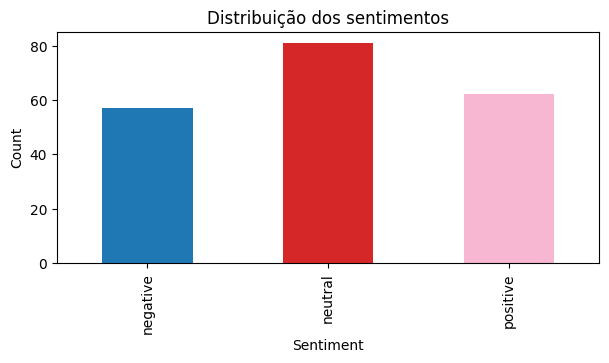

In [ ]:
from matplotlib import colormaps as cmaps

cmap = cmaps.get_cmap('tab20')

ax = df['sentiment'].value_counts().sort_index().plot(
    kind='bar',
    title='Distribuição dos sentimentos',
    figsize=(7, 3),
    color=[cmap(i / df['sentiment'].nunique()) for i in range(df['sentiment'].nunique())]
)

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
plt.show()


In [ ]:
count_sentimentos = df['sentiment'].value_counts().sort_index()
print(count_sentimentos)

sentiment
negative    57
neutral     81
positive    62
Name: count, dtype: int64


In [ ]:
count_sentimentos = df2['GPT 3.5 Sentiment'].value_counts().sort_index()
print(count_sentimentos)

GPT 3.5 Sentiment
Neutral      1
Positive     2
negative    61
neutral     49
positive    87
Name: count, dtype: int64


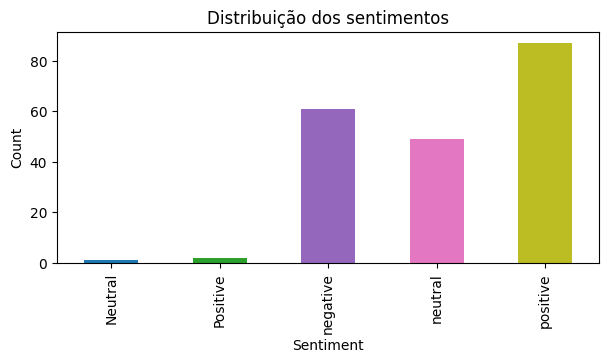

In [ ]:
from matplotlib import colormaps as cmaps

cmap = cmaps.get_cmap('tab20')

ax = df['GPT 3.5 Sentiment'].value_counts().sort_index().plot(
    kind='bar',
    title='Distribuição dos sentimentos',
    figsize=(7, 3),
    color=[cmap(i / df2['GPT 3.5 Sentiment'].nunique()) for i in range(df['GPT 3.5 Sentiment'].nunique())]
)

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
plt.show()
